<a href="https://colab.research.google.com/github/alkindiisda/bangkityog3/blob/master/bangkityog3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Assignment #05-W05-First Machine Learning Project - MLCC Project

Project Members:

*   Al Kindi Isda - alkindiisda@gmail.com
*   Bayu Dwi P - mr.ilhamtohari@gmail.com
*   Ilham Tohari - bayud40@gmail.com


# About the Dataset

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

# Pulling dataset from github

In [0]:
!pip install tensorflow==1.2

In [43]:
import os
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import pickle
import seaborn as sns
import sys
urllib.request.urlretrieve('https://github.com/alkindiisda/bangkityog3/releases/download/1.0/email-spam-data.zip', 'email-spam-data.zip')
!unzip email-spam-data.zip

Archive:  email-spam-data.zip
replace emails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: emails.csv              
replace clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: clean.csv               


# Show raw data

In [44]:
#original data
raw = pd.read_csv("emails.csv")
raw.head(20)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,16,12,8,1,0,52,2,0,0,0,1,0,5,5,56,2,7,1,1,10,0,0,10,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,9,4,6,2,0,27,1,0,0,0,0,0,7,1,40,0,0,0,0,11,1,5,2,0,6,1,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,2,6,2,0,0,28,1,0,1,0,0,5,1,0,23,0,1,0,0,2,0,0,5,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,3,3,2,1,0,15,0,1,0,0,0,0,3,2,6,0,0,0,0,0,0,0,3,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,9,4,1,0,0,35,10,0,2,1,1,0,3,1,37,0,1,1,0,4,2,1,4,2,4,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
import pandas as pd
import os.path

if(os.path.isfile("clean.csv")):
  df = pd.read_csv("clean.csv")
else:
  df = pd.read_csv("emails.csv")
  total_sum_ofR_row = df.sum(axis = 1, skipna = True)
  label = []
  token_count = []
  tokenized_text = []

  original = df.copy()
  del original['Email No.']
  del original['Prediction']
  original_columns = original.columns
  for index, row in df.iterrows():
    txt = [ " ".join([col_name] * row[col_name]) for col_name in original_columns if row[col_name] != 0]
    tokenized_text.append(" ".join(txt))
    token_count.append(total_sum_ofR_row[index] - row['Prediction'])
    if row['Prediction'] is 0:
      label.append("not spam")
    else:
      label.append("spam")

  df = pd.DataFrame({"label":label, 
                                    "token_count":token_count,
                                    "tokenized_text":tokenized_text})
  df.to_csv("clean.csv",index=False)

df.head(20)

,label,token_count,tokenized_text
0,not spam,53,ect a a is i i s s s as re re e e e e t t t t ...
1,not spam,2203,the the the the the the the the to to to to to...
2,not spam,113,ect a a a a a a a a in in in in on on i i i i ...
3,not spam,1019,to to to to to ect ect ect ect ect ect ect ect...
4,not spam,1075,the the the the the the the to to to to to to ...
5,spam,1306,the the the the to to to to to ect and and and...
6,not spam,679,the the the the the to to to ect and and and f...
7,spam,564,to to ect ect and and and for of of a a a a a ...
8,not spam,422,the the to to ect ect ect of a a a a a a a a a...
9,not spam,1239,the the the the to to to to ect ect ect ect ec...


Text(0.5, 1.0, 'Plot of Emails count with email type')

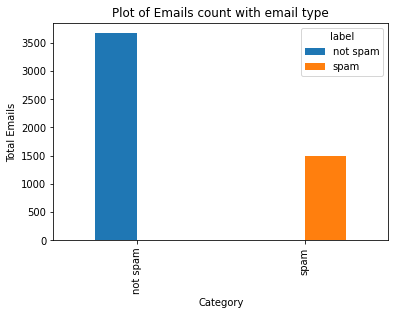

In [5]:
#plot email
df1 = df.groupby(['label','label'])['label','label'].size().unstack()

ax=df1.plot(kind='bar')
ax.set_ylabel("Total Emails")
ax.set_xlabel("Category")
ax.set_title("Plot of Emails count with email type")

Text(0.5, 1.0, 'Token length Vs Frequency for Enron Spam Emails')

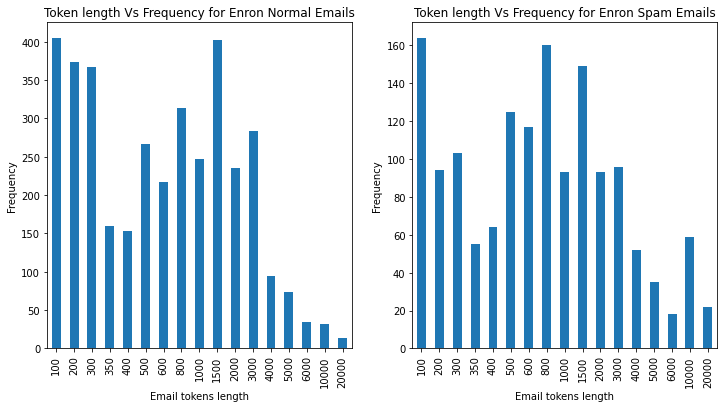

In [6]:
bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[(df['label']=='not spam')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_sub=df[ (df['label']=='spam')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

# Preprocessing

In [0]:
# We randomize the rows to subset the dataframe
df.reset_index(inplace=True)
df=df.reindex(np.random.permutation(df.index))

In [8]:
len_unseen=1000
df_unseen_test= df.iloc[:len_unseen]
df_model = df.iloc[len_unseen:]

print('total emails for unseen test data : ', len(df_unseen_test))
print('\t total spam emails for enron  : ', len(df_unseen_test[ (df_unseen_test['label']=='spam')]))
print('\t total normal emails for enron  : ', len(df_unseen_test[(df_unseen_test['label']=='not spam')]))
print()

print('total emails for model training/validation : ', len(df_model))
print('\t total spam emails for enron  : ', len(df_model[ (df_model['label']=='spam')]))
print('\t total normal emails for enron  : ', len(df_model[ (df_model['label']=='not spam')]))

total emails for unseen test data :  1000
	 total spam emails for enron  :  326
	 total normal emails for enron  :  674

total emails for model training/validation :  4172
	 total spam emails for enron  :  1174
	 total normal emails for enron  :  2998


# Training Models

In [0]:
from keras.layers import Input, Dense
from keras.models import Model,load_model
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint, TensorBoard

In [10]:
import sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#  create tf-idf model with keras

In [0]:
# max number of features
num_max = 4000

In [0]:
def train_tf_idf_model(texts):
    "train tf idf model "
    tic = time.process_time()
    

    tok = Tokenizer(num_words=num_max)
    tok.fit_on_texts(texts)
    toc = time.process_time()

    print (" -----total Computation time = " + str((toc - tic)) + " seconds")
    return tok


def prepare_model_input(tfidf_model,dataframe,mode='tfidf'):
    
    "function to prepare data input features using tfidf model"
    tic = time.process_time()
    
    le = LabelEncoder()
    sample_texts = list(dataframe['tokenized_text'])
    sample_texts = [' '.join(x.split()) for x in sample_texts]
    
    targets=list(dataframe['label'])
    targets = [1. if x=='spam' else 0. for x in targets]
    sample_target = le.fit_transform(targets)
    
    if mode=='tfidf':
        sample_texts=tfidf_model.texts_to_matrix(sample_texts,mode='tfidf')
    else:
        sample_texts=tfidf_model.texts_to_matrix(sample_texts)
    
    toc = time.process_time()
    
    print('shape of labels: ', sample_target.shape)
    print('shape of data: ', sample_texts.shape)
    
    print (" -----total Computation time for preparing model data = " + str((toc - tic)) + " seconds")
    
    return sample_texts,sample_target

In [13]:
texts=list(df_model['tokenized_text'])
tfidf_model=train_tf_idf_model(texts)

 -----total Computation time = 1.30903056599999 seconds


In [14]:
# prepare model input data
mat_texts,tags=prepare_model_input(tfidf_model,df_model,mode='tfidf')

shape of labels:  (4172,)
shape of data:  (4172, 4000)
 -----total Computation time for preparing model data = 4.363709831999998 seconds


# Split Train/validation data

We will use 85% for training, 15% for validation.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(mat_texts, tags, test_size=0.15)
print ('train data shape: ', X_train.shape, y_train.shape)
print ('validation data shape :' , X_val.shape, y_val.shape)

train data shape:  (3546, 4000) (3546,)
validation data shape : (626, 4000) (626,)


# Build models
**Deep learning model**
We will build our 3 layer deep learning model using Keras and tensorflow.

**Network**
Input -> L1 : (Linear -> Relu) -> L2: (Linear -> Relu)-> (Linear -> Sigmoid)



*   Layer L1 has 512 neurons with Relu activation
*   Layer L2 has 256 neurons with Relu activation
*   Regularization : We use dropout with probability 0.5 for L1, L2 to prevent overfitting
*   Loss Function : binary cross entropy
*   Optimizer : We use Adam optimizer for gradient descent estimation (faster optimization)
*   Data Shuffling : Data shuffling is set to true
*   Batch Size : 64
*   Learning Rate = 0.001

In [0]:
## Define and initialize the network
from tensorflow.contrib import keras
model_save_path="spam_detector_enron_model.h5"

In [0]:
def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_max,)))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras.metrics.binary_accuracy])
    print('compile done')
    return model

def check_model(model,x,y,epochs=2):
    history=model.fit(x,y,batch_size=32,epochs=epochs,verbose=1,shuffle=True,validation_split=0.2,
              callbacks=[checkpointer, tensorboard]).history
    return history


def check_model2(model,x_train,y_train,x_val,y_val,epochs=10):
    history=model.fit(x_train,y_train,batch_size=64,
                      epochs=epochs,verbose=1,
                      shuffle=True,
                      validation_data=(x_val, y_val),
                      callbacks=[checkpointer, tensorboard]).history
    return history

# define checkpointer
checkpointer = ModelCheckpoint(filepath=model_save_path,
                               verbose=1,
                               save_best_only=True)    


# define tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)




# define the predict function for the deep learning model for later use
def predict(data):
    result=spam_model_dl.predict(data)
    prediction = [round(x[0]) for x in result]
    return prediction

In [31]:
# get the compiled model
model = get_simple_model()

# load history
# history=check_model(m,mat_texts,tags,epochs=10)
history=check_model2(model,X_train,y_train,X_val,y_val,epochs=10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               2048512   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 2,180,097
Trainable params: 2,180,097
Non-trainable params: 0
_________________________________________________________________
compile done
Train on 3546 samples, validate on 626 samples
Epoch 1/10
3546/3546 [============================

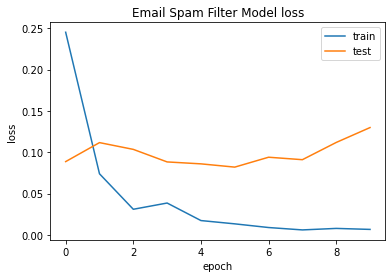

In [32]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

# Other Machine Learning Models
We will build 3 more models and compare the performance in the same way. For this purpose we will use the same tf-idf as input feature . We will train following models :



*   SVM
*   Random Forest
*   XGboost

# Lets train the svm model

In [33]:
spam_model_svm = svm.SVC(verbose=1)
spam_model_svm.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=1)

# Lets build random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
spam_model_rf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=50)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
spam_model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Lets train xgboost model

In [35]:
import xgboost as xgb
spam_model_xgboost = xgb.XGBClassifier()
spam_model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Evaluate Model Performance

In [37]:
sample_texts,sample_target=prepare_model_input(tfidf_model,df_unseen_test,mode='')

model_dict={}
model_dict['random_forest']=spam_model_rf
model_dict['svm']=spam_model_svm
model_dict['xgboost']=spam_model_xgboost


def getResults(model_dict,sample_texts,sample_target):
    '''
    Get results from different models
    '''
    results=[]
    
    results_cm={}
    
    for name,model in model_dict.items():
#         print(name)
        tic1 = time.process_time()
        if name in 'deep_learning':
            predicted_sample = predict(sample_texts)
        else:    
            predicted_sample = model.predict(sample_texts)
        toc1 = time.process_time()
#         print(predicted_sample)

        cm=sklearn.metrics.confusion_matrix(sample_target, predicted_sample)
        results_cm[name]=cm
        
        total=len(predicted_sample)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        
        time_taken=round(toc1 - tic1,4)
        res=sklearn.metrics.precision_recall_fscore_support(sample_target, predicted_sample)
        results.append([name,np.mean(res[0]),np.mean(res[1]),np.mean(res[2]),total,TP,FP,FN,TN,str(time_taken)] )
        
        
    
    df_cols=['model','precision','recall','f1_score','Total_samples','TP','FP','FN','TN','execution_time']
    result_df=pd.DataFrame(results,columns=df_cols)
    
    return result_df,results_cm
    

shape of labels:  (1000,)
shape of data:  (1000, 4000)
 -----total Computation time for preparing model data = 0.5178589359999819 seconds


# Result

In [38]:
result_df,results_cm= getResults(model_dict,sample_texts,sample_target)
result_df

,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,random_forest,0.892526,0.820211,0.843750,1000,657,17,109,217,0.0396
1,svm,0.931751,0.959049,0.942781,1000,625,49,3,323,7.9163
2,xgboost,0.905070,0.882653,0.892473,1000,644,30,62,264,0.0367


# Visualization

In [0]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['normal', 'spam'])
    df_cm2.columns=['normal','spam']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

# SVM model

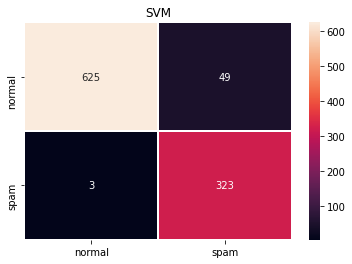

In [40]:
plot_heatmap(results_cm['svm'],'SVM')

# Random Forest Model

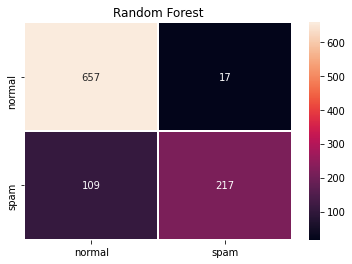

In [41]:
plot_heatmap(results_cm['random_forest'],'Random Forest')

# Xgboost Model

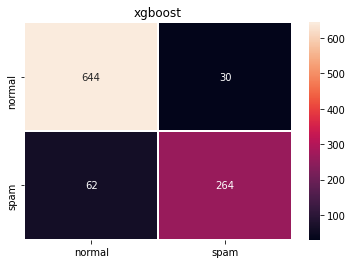

In [42]:
plot_heatmap(results_cm['xgboost'],'xgboost')